In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd

#from matplotlib import dates
import seaborn as sns

from pathlib import Path

from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# configure df options
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 20)

pd.options.display.float_format = '{:,.5f}'.format

%matplotlib inline

# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

In [3]:
# where all CSV files are
input_path = '../../dataset/csv'

In [4]:
def read_csv(filename):
    return pd.read_csv(filename, usecols=['code', 'date', 'min', 'max'], index_col='date', parse_dates=['date'])

### Merge all measurements from multiple CSV files into one dataframe

In [5]:
path = Path(input_path)

for index, file in enumerate(path.rglob('*.csv')):
    filename = f'{input_path}/{file}'
    
    if index == 0:
        df = read_csv(filename)
        count = df.shape[0]
    else:
        temp = read_csv(filename)
        count = temp.shape[0]
        
        df = pd.concat([df, temp])
                        
    print(f'{index + 1}. Processing {count} rows from file: {filename}')

1. Processing 151 rows from file: ../../dataset/csv/../../dataset/csv/type1/2018-VUNGLIEM.csv
2. Processing 151 rows from file: ../../dataset/csv/../../dataset/csv/type1/2011-SONDOC.csv
3. Processing 151 rows from file: ../../dataset/csv/../../dataset/csv/type1/2018-MOCAY.csv
4. Processing 151 rows from file: ../../dataset/csv/../../dataset/csv/type1/2018-TIENTHUY.csv
5. Processing 181 rows from file: ../../dataset/csv/../../dataset/csv/type1/2007-ANTHUAN.csv
6. Processing 181 rows from file: ../../dataset/csv/../../dataset/csv/type1/2006-LOCTHUAN.csv
7. Processing 182 rows from file: ../../dataset/csv/../../dataset/csv/type1/2008-BENTRAI.csv
8. Processing 181 rows from file: ../../dataset/csv/../../dataset/csv/type1/2009-BINHDAI.csv
9. Processing 182 rows from file: ../../dataset/csv/../../dataset/csv/type1/2016-GIAOHOA.csv
10. Processing 127 rows from file: ../../dataset/csv/../../dataset/csv/type1/2017-MYHOA.csv
11. Processing 151 rows from file: ../../dataset/csv/../../dataset/csv/

95. Processing 151 rows from file: ../../dataset/csv/../../dataset/csv/type3/2017-BENCHUA.csv
96. Processing 151 rows from file: ../../dataset/csv/../../dataset/csv/type3/2017-TANTHIENG.csv
97. Processing 151 rows from file: ../../dataset/csv/../../dataset/csv/type3/2017-TIENTHUY.csv
98. Processing 151 rows from file: ../../dataset/csv/../../dataset/csv/type3/2017-MOCAY.csv
99. Processing 151 rows from file: ../../dataset/csv/../../dataset/csv/type3/2017-TRACU.csv
100. Processing 151 rows from file: ../../dataset/csv/../../dataset/csv/type3/2017-CAIHOP.csv
101. Processing 151 rows from file: ../../dataset/csv/../../dataset/csv/type3/2017-VANGQUOITAY.csv
102. Processing 151 rows from file: ../../dataset/csv/../../dataset/csv/type3/2017-LANGTHE.csv
103. Processing 151 rows from file: ../../dataset/csv/../../dataset/csv/type3/2017-RACHRUM.csv
104. Processing 151 rows from file: ../../dataset/csv/../../dataset/csv/type3/2017-PHUOCLONG.csv
105. Processing 151 rows from file: ../../dataset/c

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15106 entries, 2018-01-01 to 2017-05-31
Data columns (total 3 columns):
code    15106 non-null object
min     15010 non-null float64
max     15106 non-null float64
dtypes: float64(2), object(1)
memory usage: 472.1+ KB


In [7]:
# first measurement date
df.index.min()

Timestamp('2002-01-01 00:00:00')

In [8]:
# last measurement date
df.index.max()

Timestamp('2018-05-31 00:00:00')

In [9]:
df['code'].unique()

array(['VUNGLIEM', 'SONDOC', 'MOCAY', 'TIENTHUY', 'ANTHUAN', 'LOCTHUAN',
       'BENTRAI', 'BINHDAI', 'GIAOHOA', 'MYHOA', 'TANTHIENG', 'SONPHU',
       'CAMSON', 'TICHTHIEN', 'PHUOCLONG', 'CONGNANGAM', 'THANHTHOIA',
       'MYTHANH', 'HUNGKHANHTRUNGB', 'CAIMIT', 'HUONGMY', 'MYVAN',
       'BENCHUA', 'TRACU', 'CAIHOP', 'VANGQUOITAY', 'LANGTHE', 'RACHRUM'],
      dtype=object)

In [10]:
# how stations are distributed in the dataset
datapoint_df = df['code'].value_counts()

datapoint_df

SONDOC             2271
LOCTHUAN           2154
ANTHUAN            2108
BENTRAI            2108
BINHDAI            2108
                   ... 
VUNGLIEM            151
RACHRUM             151
HUNGKHANHTRUNGB     151
LANGTHE             151
HUONGMY              92
Name: code, Length: 28, dtype: int64

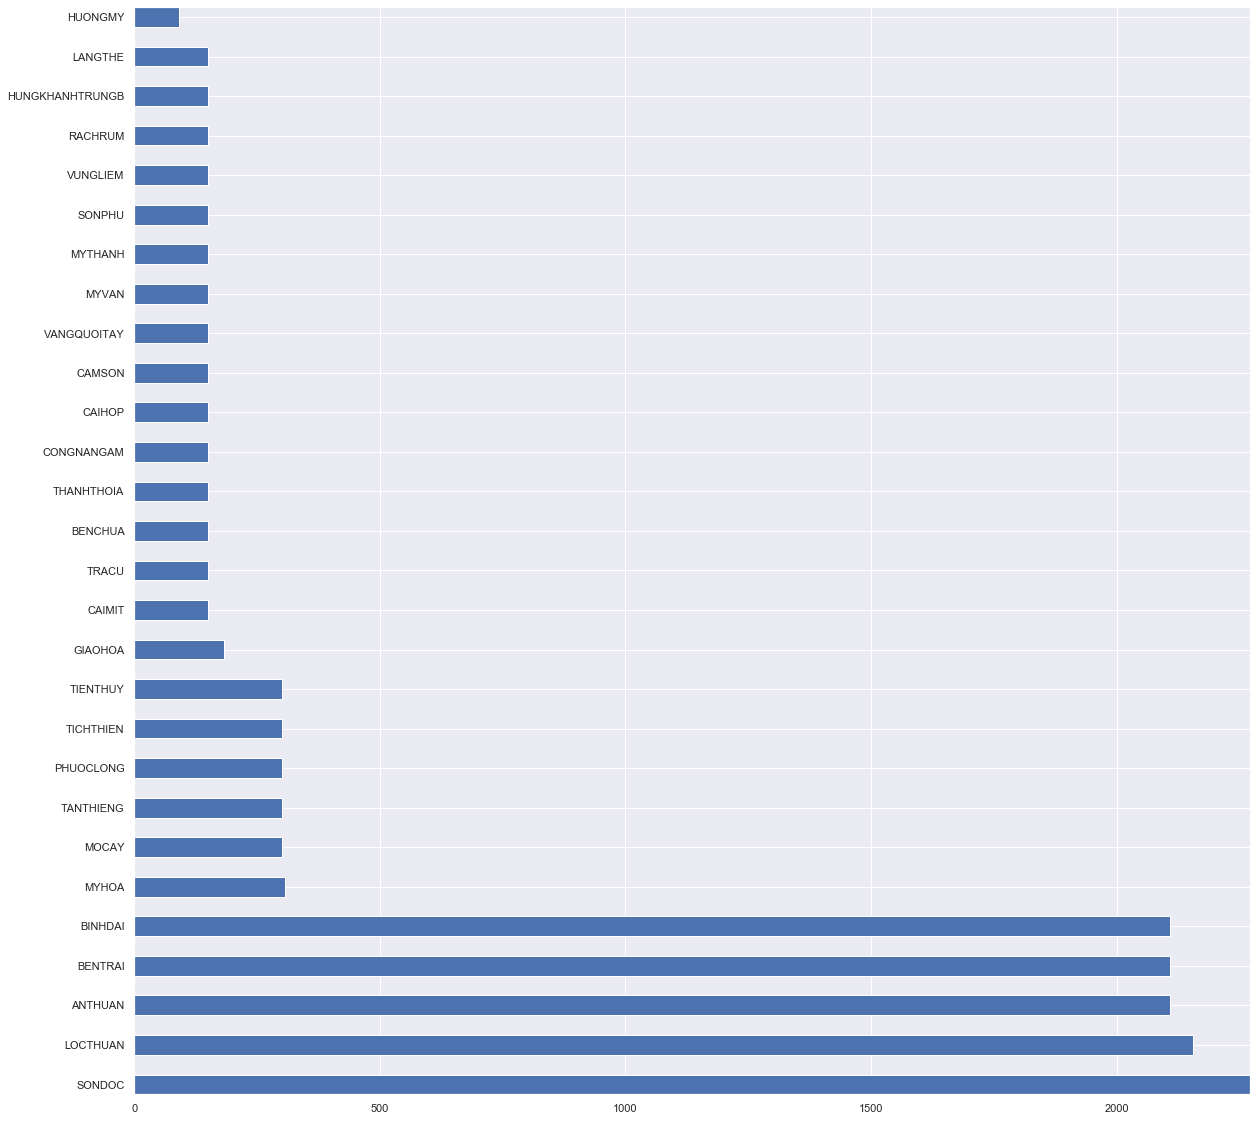

In [11]:
# chart on how stations are distributed in the dataset
datapoint_df.plot.barh(figsize=(20, 20)).autoscale(enable=True, axis='both', tight=True)

In [12]:
# sort by date index
df.sort_index(inplace=True)

df.head(10)

,code,min,max
date,,,
2002-01-01,LOCTHUAN,0.00000,0.00000
2002-01-01,ANTHUAN,3.50000,6.00000
2002-01-01,SONDOC,0.10000,0.30000
2002-01-01,BENTRAI,0.20000,1.00000
2002-01-01,BINHDAI,0.50000,2.00000
2002-01-02,SONDOC,0.10000,0.40000
2002-01-02,BINHDAI,1.00000,3.00000
2002-01-02,ANTHUAN,3.00000,5.50000
2002-01-02,LOCTHUAN,0.00000,0.00000


### Basic visualization

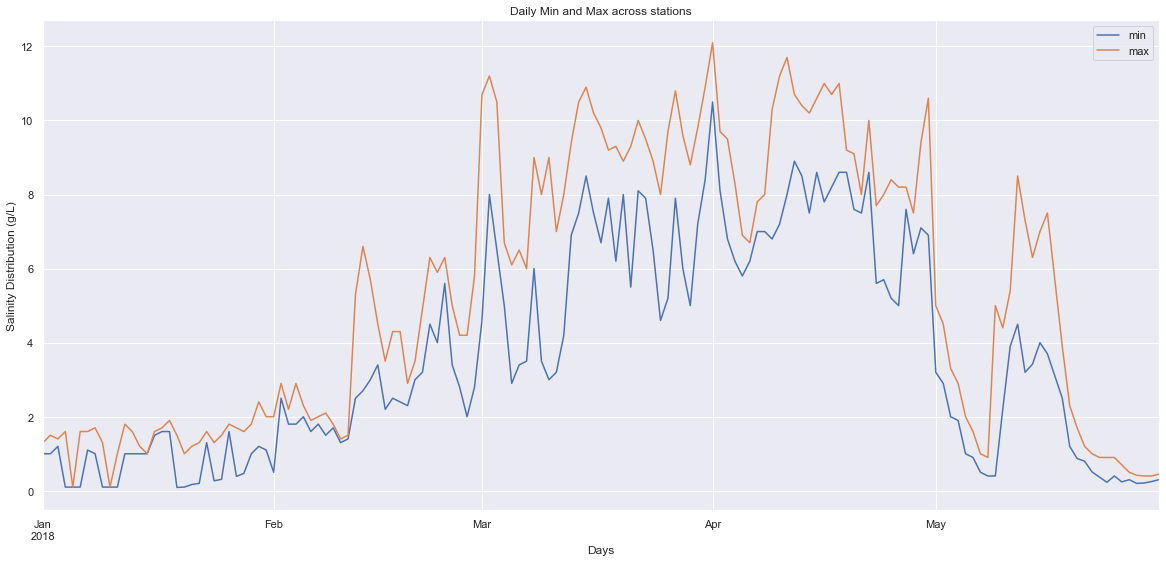

In [13]:
# Daily min and max value across multiple stations
ax = df.loc['2018', 'min'].resample('D').max().plot(figsize=(20, 9), title='Daily Min and Max across stations')
df.loc['2018', 'max'].resample('D').max().plot(ax=ax, figsize=(20, 9))
ax.legend(['min', 'max']);
ax.set_xlabel('Days')
ax.set_ylabel('Salinity Distribution (g/L)');

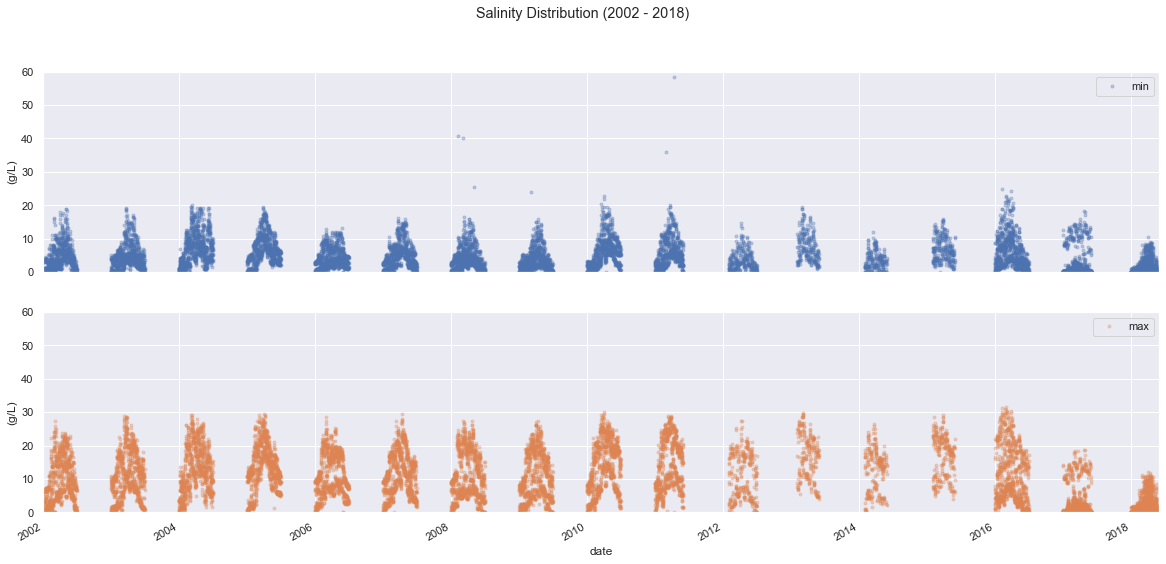

In [14]:
# min and max across station from 2002 to 2018
axes = df[['min', 'max']].plot(marker='.', ylim=[0, 60], alpha=0.3, linestyle='None', figsize=(20, 9), subplots=True, title='Salinity Distribution (2002 - 2018)')
for ax in axes:
    ax.set_ylabel('(g/L)')

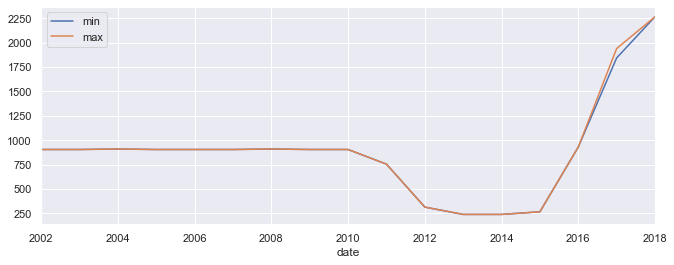

In [15]:
# Number of measurements by year
df.groupby(df.index.year)['min', 'max'].count().plot();

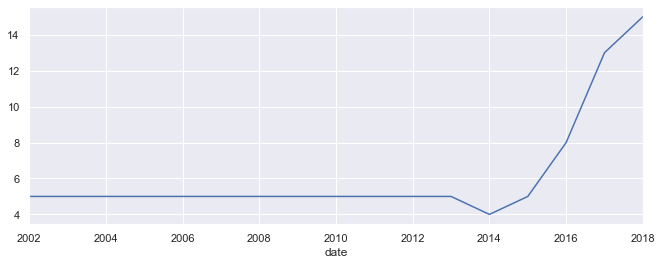

In [16]:
# Number of stations contributed to measurements by year
df.groupby([df.index.year])['code'].nunique().plot();

### Some 'min' greater than 'max', does not make sense

In [17]:
invalid_df = df[df['min'] > df['max']]

invalid_df

,code,min,max
date,,,
2002-04-01,ANTHUAN,17.00000,14.50000
2004-01-31,ANTHUAN,6.90000,4.80000
2004-05-23,LOCTHUAN,4.06000,3.36000
2005-05-24,SONDOC,5.00000,1.40000
2008-01-05,SONDOC,0.20000,0.10000
...,...,...,...
2017-01-09,TRACU,2.00000,0.20000
2017-02-15,BENCHUA,13.90000,12.00000
2017-03-24,LANGTHE,0.30000,0.10000


In [18]:
# save to csv file to report back data owner for comfirmation
invalid_df.to_csv(f'../../dataset/invalid/min_greater_max.csv', index=True)

In [19]:
df['min'], df['max'] = np.where(df['min'] > df['max'], (df['max'], df['min']), (df['min'], df['max']))

In [20]:
# double check if there is any min > max
invalid_df = df[df['min'] > df['max']]

invalid_df.shape

(0, 3)

### Handle missing values in 'min' column

In [21]:
# review measurements having no min values
na_df = df[df['min'].isna()]

na_df

,code,min,max
date,,,
2017-02-01,MYHOA,nan,0.30000
2017-02-02,MYHOA,nan,0.20000
2017-02-03,MYHOA,nan,0.10000
2017-02-04,MYHOA,nan,0.10000
2017-02-05,MYHOA,nan,0.10000
...,...,...,...
2017-05-03,MYHOA,nan,0.40000
2017-05-04,MYHOA,nan,0.30000
2017-05-05,MYHOA,nan,0.20000


In [22]:
# save to csv file to report back data owner for comfirmation
na_df.to_csv(f'../../dataset/invalid/nan_min.csv', index=True)

In [23]:
# what is the min measures in case of min = NaN
na_df.groupby([na_df.index.year, 'code']).min()

,,min,max
date,code,,
2017,MYHOA,nan,0.10000


In [24]:
# what is the max measures in case of min = NaN
na_df.groupby([na_df.index.year, 'code']).max()

,,min,max
date,code,,
2017,MYHOA,nan,2.60000


#### What is the strategy to fill the min NaN?

In [25]:
# Let drop them for now
df.dropna(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15010 entries, 2002-01-01 to 2018-05-31
Data columns (total 3 columns):
code    15010 non-null object
min     15010 non-null float64
max     15010 non-null float64
dtypes: float64(2), object(1)
memory usage: 469.1+ KB


### Merge GeoPandas based station dataframe with measurement dataframe 

In [26]:
# reload stations from shapefile
station_df = gpd.read_file('../../dataset/station/station.shp', encoding='utf-8')

station_df.crs

{'init': 'epsg:4326'}

In [27]:
station_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
code        20 non-null object
name        20 non-null object
x           20 non-null float64
y           20 non-null float64
ft          20 non-null float64
cm          20 non-null float64
geometry    20 non-null geometry
dtypes: float64(4), geometry(1), object(2)
memory usage: 1.2+ KB


In [28]:
station_df.head(10)

,code,name,x,y,ft,cm,geometry
0,TIENTHUY,Tiên Thuỷ,"638,108.95629","1,132,743.34179",7.00000,213.36000,POINT (106.26103 10.24475)
1,PHUOCLONG,Phước Long,"654,447.97849","1,120,366.11273",13.00000,396.24000,POINT (106.40969 10.13223)
2,MOCAY,Mỏ Cày,"640,695.88096","1,114,676.77078",22.00000,670.56000,POINT (106.28399 10.08130)
3,TANTHIENG,Tân Thiềng,"633,534.72801","1,123,276.54032",17.00000,518.16000,POINT (106.21894 10.15931)
4,VANGQUOITAY,Vang Quới Tây,"668,101.63713","1,134,363.39362",31.00000,944.88000,POINT (106.53489 10.25822)
5,CAMSON,Cẩm Sơn,"647,782.35131","1,108,081.20329",19.00000,579.12000,POINT (106.34840 10.02140)
6,LOCTHUAN,Lộc Thuận,"674,962.03107","1,132,414.50741",9.00000,274.32000,POINT (106.59743 10.24030)
7,C.SONDOC,C. Sơn Đốc,"661,073.13893","1,111,850.93564",2.00000,60.96000,POINT (106.46980 10.05497)
8,C.CAIMIT,C. Cái Mít,"656,680.70795","1,117,059.97700",12.00000,365.76000,POINT (106.42994 10.10224)
9,SONPHU,Sơn Phú,"651,337.94260","1,125,205.88153",24.00000,731.52000,POINT (106.38150 10.17611)


In [29]:
# replace x, y in WGS84-48N with Latitude, Longitude coordiates
station_df['x'], station_df['y'] = station_df['geometry'].x, station_df['geometry'].y

station_df.head(10)

,code,name,x,y,ft,cm,geometry
0,TIENTHUY,Tiên Thuỷ,106.26103,10.24475,7.00000,213.36000,POINT (106.26103 10.24475)
1,PHUOCLONG,Phước Long,106.40969,10.13223,13.00000,396.24000,POINT (106.40969 10.13223)
2,MOCAY,Mỏ Cày,106.28399,10.08130,22.00000,670.56000,POINT (106.28399 10.08130)
3,TANTHIENG,Tân Thiềng,106.21894,10.15931,17.00000,518.16000,POINT (106.21894 10.15931)
4,VANGQUOITAY,Vang Quới Tây,106.53489,10.25822,31.00000,944.88000,POINT (106.53489 10.25822)
5,CAMSON,Cẩm Sơn,106.34840,10.02140,19.00000,579.12000,POINT (106.34840 10.02140)
6,LOCTHUAN,Lộc Thuận,106.59743,10.24030,9.00000,274.32000,POINT (106.59743 10.24030)
7,C.SONDOC,C. Sơn Đốc,106.46980,10.05497,2.00000,60.96000,POINT (106.46980 10.05497)
8,C.CAIMIT,C. Cái Mít,106.42994,10.10224,12.00000,365.76000,POINT (106.42994 10.10224)
9,SONPHU,Sơn Phú,106.38150,10.17611,24.00000,731.52000,POINT (106.38150 10.17611)


In [30]:
# drop unused columns
station_df.drop(['name', 'ft', 'geometry'], axis=1, inplace=True)

station_df.head(10)

,code,x,y,cm
0,TIENTHUY,106.26103,10.24475,213.36000
1,PHUOCLONG,106.40969,10.13223,396.24000
2,MOCAY,106.28399,10.08130,670.56000
3,TANTHIENG,106.21894,10.15931,518.16000
4,VANGQUOITAY,106.53489,10.25822,944.88000
5,CAMSON,106.34840,10.02140,579.12000
6,LOCTHUAN,106.59743,10.24030,274.32000
7,C.SONDOC,106.46980,10.05497,60.96000
8,C.CAIMIT,106.42994,10.10224,365.76000
9,SONPHU,106.38150,10.17611,731.52000


In [31]:
# reserve the date index
df.reset_index(inplace=True)

df.head()

,date,code,min,max
0,2002-01-01,LOCTHUAN,0.00000,0.00000
1,2002-01-01,ANTHUAN,3.50000,6.00000
2,2002-01-01,SONDOC,0.10000,0.30000
3,2002-01-01,BENTRAI,0.20000,1.00000
4,2002-01-01,BINHDAI,0.50000,2.00000


In [32]:
# left join df with station_df
df = df.merge(station_df, on='code', how='left')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15010 entries, 0 to 15009
Data columns (total 7 columns):
date    15010 non-null datetime64[ns]
code    15010 non-null object
min     15010 non-null float64
max     15010 non-null float64
x       13349 non-null float64
y       13349 non-null float64
cm      13349 non-null float64
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 938.1+ KB


In [33]:
df.head(20)

,date,code,min,max,x,y,cm
0,2002-01-01,LOCTHUAN,0.00000,0.00000,106.59743,10.24030,274.32000
1,2002-01-01,ANTHUAN,3.50000,6.00000,106.57215,9.99752,0.00000
2,2002-01-01,SONDOC,0.10000,0.30000,106.52635,10.02522,30.48000
3,2002-01-01,BENTRAI,0.20000,1.00000,106.53715,9.87584,0.00000
4,2002-01-01,BINHDAI,0.50000,2.00000,106.69681,10.20635,152.40000
...,...,...,...,...,...,...,...
15,2002-01-04,BINHDAI,1.20000,4.00000,106.69681,10.20635,152.40000
16,2002-01-04,ANTHUAN,3.00000,5.00000,106.57215,9.99752,0.00000
17,2002-01-04,SONDOC,0.20000,0.50000,106.52635,10.02522,30.48000
18,2002-01-04,LOCTHUAN,0.00000,0.00000,106.59743,10.24030,274.32000


In [34]:
# restore date index
df.set_index('date', inplace=True)

df.head(20)

,code,min,max,x,y,cm
date,,,,,,
2002-01-01,LOCTHUAN,0.00000,0.00000,106.59743,10.24030,274.32000
2002-01-01,ANTHUAN,3.50000,6.00000,106.57215,9.99752,0.00000
2002-01-01,SONDOC,0.10000,0.30000,106.52635,10.02522,30.48000
2002-01-01,BENTRAI,0.20000,1.00000,106.53715,9.87584,0.00000
2002-01-01,BINHDAI,0.50000,2.00000,106.69681,10.20635,152.40000
...,...,...,...,...,...,...
2002-01-04,BINHDAI,1.20000,4.00000,106.69681,10.20635,152.40000
2002-01-04,ANTHUAN,3.00000,5.00000,106.57215,9.99752,0.00000
2002-01-04,SONDOC,0.20000,0.50000,106.52635,10.02522,30.48000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15010 entries, 2002-01-01 to 2018-05-31
Data columns (total 6 columns):
code    15010 non-null object
min     15010 non-null float64
max     15010 non-null float64
x       13349 non-null float64
y       13349 non-null float64
cm      13349 non-null float64
dtypes: float64(5), object(1)
memory usage: 820.9+ KB


### There are stations without coordinates

In [36]:
nocoor_df = df[df['x'].isna()]

nocoor_df

,code,min,max,x,y,cm
date,,,,,,
2017-01-01,RACHRUM,0.10000,0.40000,nan,nan,nan
2017-01-01,CAIHOP,0.10000,0.10000,nan,nan,nan
2017-01-01,BENCHUA,11.00000,14.00000,nan,nan,nan
2017-01-01,TRACU,0.30000,0.60000,nan,nan,nan
2017-01-01,TICHTHIEN,0.00000,0.00000,nan,nan,nan
...,...,...,...,...,...,...
2018-05-30,TICHTHIEN,0.00000,0.00000,nan,nan,nan
2018-05-31,CAIMIT,0.10000,0.20000,nan,nan,nan
2018-05-31,TICHTHIEN,0.00000,0.00000,nan,nan,nan


In [37]:
nocoor_df = nocoor_df.groupby('code')['max'].count()
nocoor_df = pd.DataFrame(nocoor_df).rename(columns = {'max': 'count'})

nocoor_df

,count
code,
BENCHUA,151
CAIHOP,151
CAIMIT,151
CONGNANGAM,151
LANGTHE,151
MYVAN,151
RACHRUM,151
TICHTHIEN,302
TRACU,151


In [38]:
# save to csv file to report back data owner for comfirmation
nocoor_df.to_csv(f'../../dataset/invalid/nocoor.csv', index=True)

### Final training dataset

In [39]:
# drop datapoints which their stations have no coordinates
df.dropna(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13349 entries, 2002-01-01 to 2018-05-31
Data columns (total 6 columns):
code    13349 non-null object
min     13349 non-null float64
max     13349 non-null float64
x       13349 non-null float64
y       13349 non-null float64
cm      13349 non-null float64
dtypes: float64(5), object(1)
memory usage: 730.0+ KB


In [40]:
# save to csv file as training dataset
df.to_csv(f'../../dataset/final/training.csv', index=True)

### Apply some statistical analysis

In [44]:
df[df['max'] < 0.02]

,code,min,max,x,y,cm
date,,,,,,
2002-01-01,LOCTHUAN,0.00000,0.00000,106.59743,10.24030,274.32000
2002-01-02,LOCTHUAN,0.00000,0.00000,106.59743,10.24030,274.32000
2002-01-03,LOCTHUAN,0.00000,0.00000,106.59743,10.24030,274.32000
2002-01-04,LOCTHUAN,0.00000,0.00000,106.59743,10.24030,274.32000
2002-01-05,LOCTHUAN,0.00000,0.00000,106.59743,10.24030,274.32000
...,...,...,...,...,...,...
2018-05-31,MYTHANH,0.00000,0.00000,106.32674,10.24610,701.04000
2018-05-31,LOCTHUAN,0.00000,0.00000,106.59743,10.24030,274.32000
2018-05-31,TANTHIENG,0.00000,0.00000,106.21894,10.15931,518.16000


In [80]:
# Seasonal Decomposition aka ETS Decomposition
result = seasonal_decompose(df[df['max'] > 0.02], model='multiplicative', freq=12, extrapolate_trend = 12).plot()  # 12 for monthly data
#result = seasonal_decompose(df['max'], freq=6, model='add')  # 12 for monthly data

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

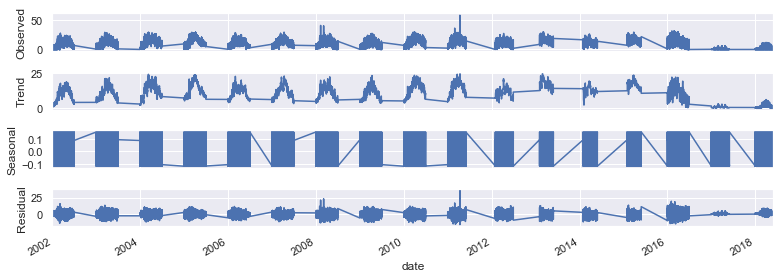

In [69]:
result.plot();

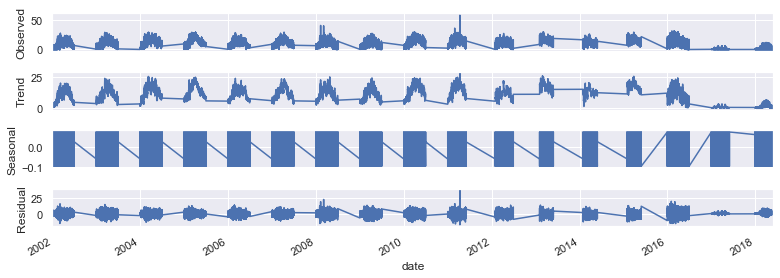

In [78]:
# experience with other frequencies
seasonal_decompose(df['max'], freq=5, model='add').plot();

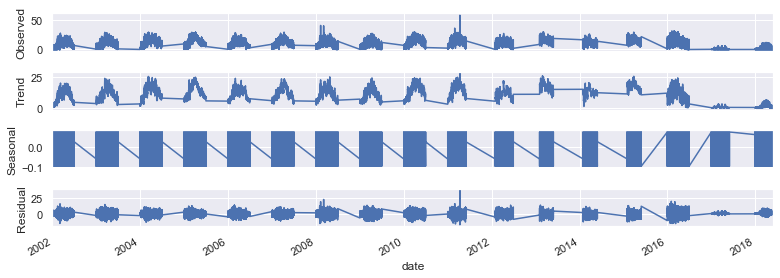

In [75]:
seasonal_decompose(df['max'], freq=12, model='add').plot();

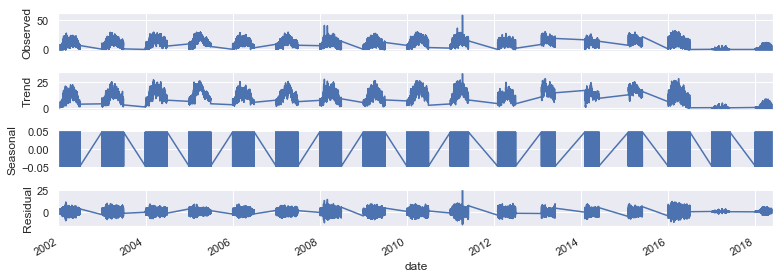

In [76]:
seasonal_decompose(df['max'], freq=2, model='add').plot();

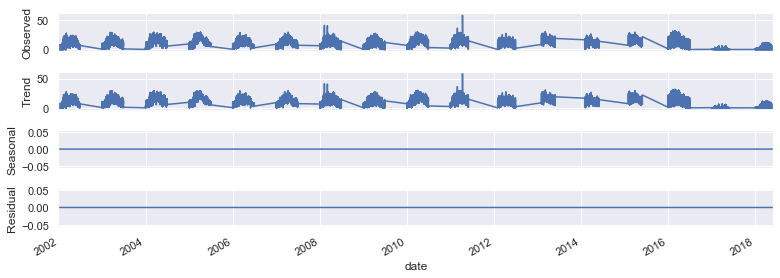

In [77]:
seasonal_decompose(df['max'], freq=1, model='add').plot();

In [56]:
# trend component
result.trend

date
2002-01-01       nan
2002-01-01   3.07500
2002-01-01   1.90000
2002-01-01   1.07500
2002-01-01   1.35000
               ...  
2018-05-31   0.22500
2018-05-31   0.13750
2018-05-31   0.05000
2018-05-31   0.05000
2018-05-31       nan
Name: max, Length: 13349, dtype: float64

In [57]:
# seasonal component
result.seasonal

date
2002-01-01   -0.04765
2002-01-01    0.04765
2002-01-01   -0.04765
2002-01-01    0.04765
2002-01-01   -0.04765
               ...   
2018-05-31   -0.04765
2018-05-31    0.04765
2018-05-31   -0.04765
2018-05-31    0.04765
2018-05-31   -0.04765
Name: max, Length: 13349, dtype: float64

In [58]:
# residual component
result.resid

date
2002-01-01        nan
2002-01-01    2.87735
2002-01-01   -1.55235
2002-01-01   -0.12265
2002-01-01    0.69765
               ...   
2018-05-31    0.27265
2018-05-31   -0.18515
2018-05-31    0.09765
2018-05-31   -0.09765
2018-05-31        nan
Name: max, Length: 13349, dtype: float64